#1 - Introduction

> The introduction chapter should be filled with identity, big picture of the dataset used, and the objectives to be achieved.

Name : Hillidatul Ilmi

Batch : FTDS-012

Dataset URL : https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download

Dataset : Telco Customer Churn Dataset.

Objective : The purpose of the Telco Customer Churn data set is to predict the measurement of the percentage of customer accounts that cancel by choosing not to renew their subscription (class no) and continue to renew their service (class yes). To see a measure of how many customers stop using a subscription product, which can be measured based on actual usage or failure while getting telco services. Based on this, I will analyze churn using the Deep Learning ANN method.

#2 - Import Libraries

> The first cell in the notebook must contain and contain only all the libraries used in the project.

Import libraries are used to import the contents of modules and are used to support some syntax commands to be executed. In the process of Deep learning milstone 1 phase 2 will use the following libraries:

In [ ]:
# Define Libraries

# library calling dataset and data
import pandas as pd
import numpy as np 

# library data visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import plotly.graph_objects as go

# library data preprocessing
!pip install feature-engine
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from imblearn.over_sampling import SMOTE

# library model definition dan training algorithm
from sklearn.pipeline import Pipeline
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

# librry evaluation model algorithm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


the library that I will use to work on milstone 1 Phase 2 is from the numpy, pandas, matplotlib, seaborn, sklearn and several various TensorFlow modules for use in supporting the running of a model.

#3 - Data Loading

> This section contains the data preparation process before further data exploration is carried out. The Data Loading process can be in the form of giving a new name for each column, checking the size of the dataset, etc.

In [ ]:
# Viewing or processing a CSV dataset from a drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Displays data to be used in analysis or loading from data sets
data = pd.read_csv('https://raw.githubusercontent.com/HillidatulIlmi/Dataset/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


The Telco Customer Churn dataset consists of 21 columns with 20 feature parameters and 1 target parameter. Followed through the blog hashmicro.com [(blog link )](https://www.hashmicro.com/en/blog/churn-rate-is/), Churn is the act of someone leaving a group within a certain time span. The definition of churn departs from the calculation of the percentage of accounts or customers who do not renew their subscriptions. Churn is usually calculated based on a specific time span such as every month, quarter, even yearly. So, churn rate is one of the most important metrics for companies like SaaS or subscription-based companies.

When new customers start buying and/or using a product, each new user contributes to the product's growth rate. Inevitably some of these subscribers will eventually discontinue their use or cancel their subscriptions; either because they switched to a competitor or alternative solution, no longer needed the functionality of the product, they were dissatisfied with their user experience, or they could no longer afford or justify the cost. Customers who stop using/paying are “churn” for a certain period of time.

The following is the information for each column of the Telco Customer Churn Dataset:

- CustomerID : Customer ID
- Gender : Gender (Female/Female, Male/Male)
- SeniorCitizen : Whether the customer is a senior customer or not (1, 0)
- Partner : Customer has a partner or not (Yes/Yes, No/No)
- Dependents : Does the customer have dependents or not (Yes/Yes, No/No)
- Tenure : The number of months the customer has stayed with the company or the number of months the customer has been a customer
- PhoneService : Does the customer have telephone service or not (Yes/Yes, No/No)
- Multiple Lines : Does the customer have multiple lines or not (Yes/Yes, No/No, No telephone service/No internet service)
- InternetService : Customer internet service provider (DSL, Fiber optic, No)
- OnlineSecurity : Does the customer have online security or not (Yes/Yes, No/No, No telephone service/No internet service)
- OnlineBackup : Does the customer have an online backup or not (Yes/Yes, No/No, No telephone service/No internet service)
- DeviceProtection : Does the customer have device protection or not (Yes/Yes, No/No, No telephone service/No internet service)
- TechSupport : Does the customer have technical support or not (Yes/Yes, No/No, No telephone service/No internet service)
- StreamingTV : Does the customer have TV streaming or not (Yes/Yes, No/No, No telephone service/No internet service)
- StreamingMovies : Whether the customer has streaming movies or not (Yes/Yes, No/No, No telephone service/No internet service)
- Contract : Customer contract period (Month-to-month/Month-to-month, One year/One year, Two years/Two year)
- PaperlessBilling : Does the customer have paperless billing or not (Yes/Yes, No/No)
- PaymentMethod : Customer payment method (Electronic check/Electronic check, Postal check/Mailed check, Bank transfer (automatic)/Bank transfer, Credit card (automatic)/Credit card)
- MonthlyCharges : The amount charged to the customer every month
- TotalCharges: The total amount charged to the customer
- Churn: Whether the customer remains subscribed or not (Yes/Yes or No/No)

In [ ]:
# Duplicate Data
data_copy = data.copy()

Duplicate (duplicate) the dataset, if there is a change in the column or attribute can still be compared with the original dataset. The function of multiplication so that the original data can still be used if there are some changes in the contents of the dataset.

In [ ]:
# Check the size of the dataset to be used
print(data.shape)

(7043, 21)


Based on the .shape command, the Telco Customer Churn dataset size consists of 7043 rows and 21 columns.

In [ ]:
# View column names from the Telco Customer Churn dataset table
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

The column names have been described previously, these columns have different size values for each column from customers who receive the services of a company.

In [ ]:
# Check dataset information from Telco Customer Churn table
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Check and ensure that each feature has a data type that matches the data shown in the table. In this case, the MonthlyCharge and tenure features have float64 and int64 data types, but the TotalCharge feature has an 'object' data type. Then the changes will be made by printing the data types of all columns and depending on the displayed value, I'll use the label or the to_numeric encoding to convert the feature to numeric format. Reference source [link change feature type](https://www.kaggle.com/code/jayantibhattacharya/customer-churn-prediction-using-ann)

In [ ]:
# Check the type of data that must match the display of the Telco Customer Churn dataset
data["TotalCharges"]=pd.to_numeric(data["TotalCharges"], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Based on the data.info() command, the Telco Customer Churn table has about 21 columns, of which 18 columns are identified as object type, 1 column is identified as integer type and the other 2 columns are float type.

#4 - Exploratory Data Analysis (EDA)

> This section contains data exploration on the dataset above by using queries, grouping, simple visualization, and so on.

For EDA display several visualizations in the form of feature or target information in the form of bar charts, pie charts, scatterplots, queries, describe and others. The following is a dataset visualization from the Telco Customer Churn table:

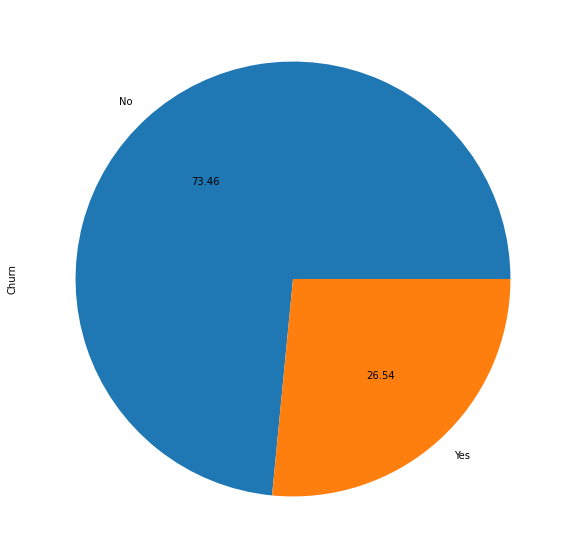

In [ ]:
# Visualization of pie charts regarding service status targets for Churn customers
# View classes from Telco Customer Churn
data['Churn'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f')
sns.set_theme(style="darkgrid")

Description of Churn Target Visualization:

Pie chart visualization shows the comparison of customer classes in extending the services they receive from the company. Based on the visualization, class No is more dominant at 73.5%, which means a measurement of the percentage of customers who cancel or choose not to renew their subscription and can also show dissatisfaction with the product or service. While the visualization of the Yes class is 26.5% less, which means a measurement of the percentage of customers who continue to renew their subscriptions and can also show they still like and are comfortable with the product or service. When compared to class No, which is greater than class Yes, the comparison is very different, namely 7: 2, indicating the target churn is imbalance, where the distribution of data classes is not balanced, the number of data classes (Yes = 1869) is less than the number of data classes (No = 5174).

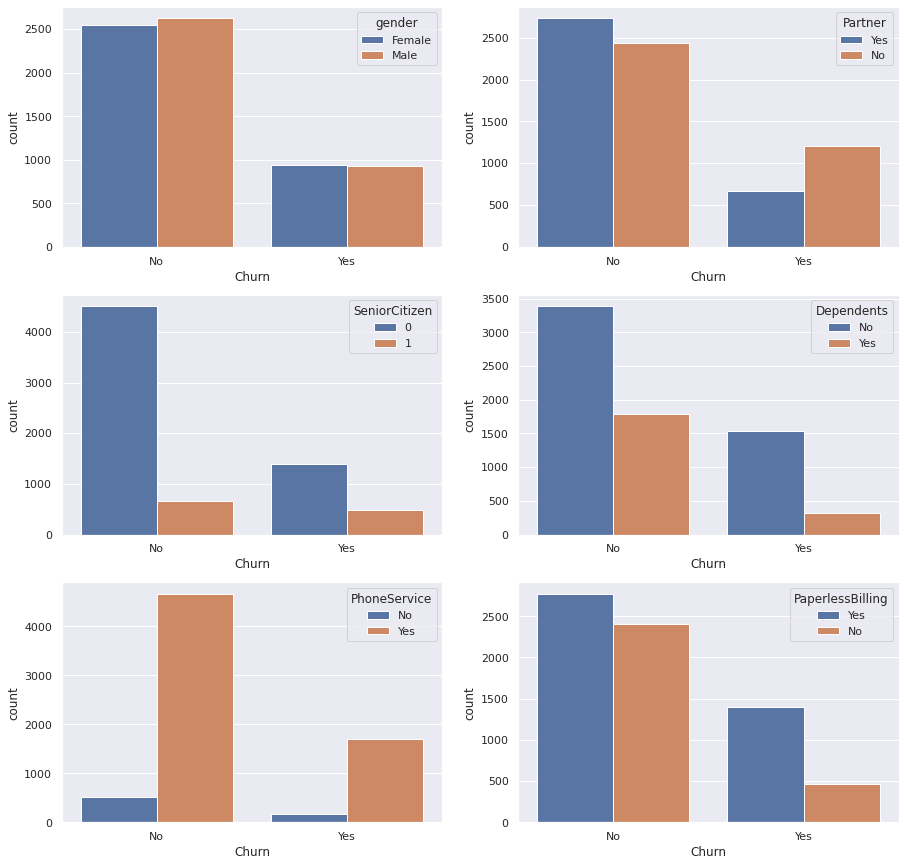

In [ ]:
# Bar chart visualization of category binary features against churn target targets
fig,axs=plt.subplots(3,2, figsize=(15,15))
sns.countplot(x='Churn',hue='gender',data=data,ax=axs[0,0])
sns.countplot(x='Churn',hue='Partner',data=data,ax=axs[0,1])
sns.countplot(x='Churn',hue='SeniorCitizen',data=data,ax=axs[1,0])
sns.countplot(x='Churn',hue='Dependents',data=data,ax=axs[1,1])
sns.countplot(x='Churn',hue='PhoneService',data=data,ax=axs[2,0])
sns.countplot(x='Churn',hue='PaperlessBilling',data=data,ax=axs[2,1])
plt.show()

Berdasarkan hasil visualisasi diagram batang terhadap fitur binary kategorik, diperoleh beberapa informasi sebagai berikut :
1. Fitur Jenis kelamin (gender), dimana jenis kelamin wanita (female) lebih didominasi tidak memperpanjang layanan mereka terhadap produk/bisnis pelayanan perusahaan telco. Begitu juga jenis kelamin laki-laki (Male) lebih didominasi tidak memperpanjang layanan mereka. Hanya sekitar 900 pelanggan yang memperpanjang layanan mereka baik wanita maupun laki-laki.
2. Fitur Patner, dimana pelanggan memiliki mitra peusahaan tetap (Yes) atau tidak (No). Pelanggan yang memiliki mitra perusahaan lebih didominasi tetap kembali memperpanjang layanan yang mereka lakukan, sedangkan pelanggan yang tidak memiliki mitra perusahaan juga lebih banyak memilih tidak memperpanjang layanan mereka, terhadap jasa pelayanan maupun produk.
3. Fitur SeniorCitizen, dimana customer sudah menjadi pelanggan senior/lama (1)atau tidak (0). Pelanggan senior yang sudah lama bermitra dengan perusahaan, juga didominasi tidak memperpanjang kembali layanan yang mereka terima. Sebaliknya, juga banyak pelanggan baru didominasi tidak memperpanjang layanan mereka. Berdasrkan hal ini, bisa menjadi evaluasi perusahaan mengapa para customer banyak tidak mengunakan jasa layanan yang telah ditawarkan.
4. Fitur Dependents, dimana pelanggan memiliki tanggungan (Yes) atau tidak (No). Pelanggan yang memperpanjang layanan mereka lebih didominasi yang tidak memiliki beberapa tanggungan kehidupan, sedangkan pelanggan yang tidak memeperpanjang layanan mereka lebih didominasi pelanggan dengan tangggungan kebutuhan kehidupan.
5. Fitur PhoneService, dimana pelanggan memiliki layanan telepon (Yes) atau tidak (No). Pelanggan yang memperpanjang layanan mereka lebih didominasi menerima pelayanan telpon dari perusahaan, sedangkan pelanggan yang tidak memperpanjang layanan mereka lebih juga didominasi menerima pelayanan telpon dari perusahaan.
6. Fitur PaperlessBilling, dimana pelanggan memiliki paperless billing (Yes) atau tidak (No). Pelanggan yang memperpanjang layanan mereka lebih didominasi memiliki paperless billing, sedangkan pelanggan yang tidak memperpanjang layanan mereka lebih juga didominasi memiliki paperless billing.

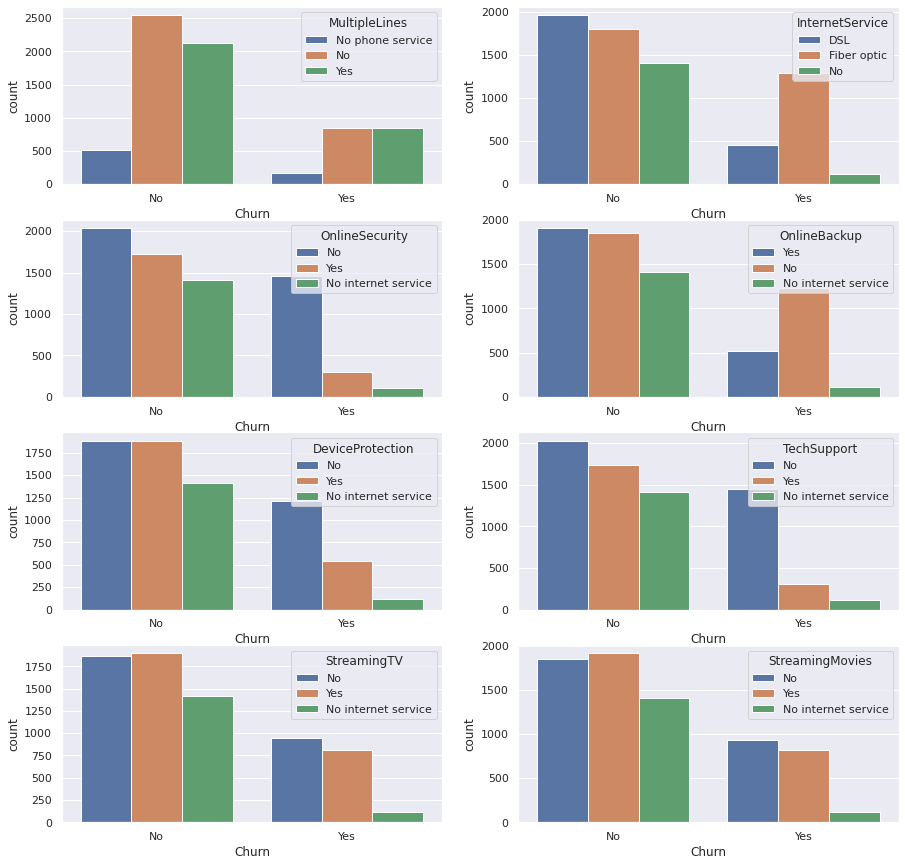

In [ ]:
# Bar chart visualization of multi-category features against churn target targets
fig,axs=plt.subplots(4,2, figsize=(15,15))
sns.countplot(x='Churn',hue='MultipleLines',data=data,ax=axs[0,0])
sns.countplot(x='Churn',hue='InternetService',data=data,ax=axs[0,1])
sns.countplot(x='Churn',hue='OnlineSecurity',data=data,ax=axs[1,0])
sns.countplot(x='Churn',hue='OnlineBackup',data=data,ax=axs[1,1])
sns.countplot(x='Churn',hue='DeviceProtection',data=data,ax=axs[2,0])
sns.countplot(x='Churn',hue='TechSupport',data=data,ax=axs[2,1])
sns.countplot(x='Churn',hue='StreamingTV',data=data,ax=axs[3,0])
sns.countplot(x='Churn',hue='StreamingMovies',data=data,ax=axs[3,1])
plt.show()

Based on the results of the multi-category feature bar chart visualization, the following information is obtained:
1. Multiple Lines feature, where customers have many channels (Yes), no (No) and no telephone service (No internet service). Customers who do not extend their services are dominated by customers who do not have many channels. Meanwhile, customers who continue to extend their services are dominated by customers who do not have many channels and there are many channels.
2. InternetService feature, where the internet service provider has customers in the form of DSL, Fiber optic and No. Customers who do not extend their services are dominated by internet services in the form of DSL. Meanwhile, customers who continue to extend their services are dominated by internet services in the form of fiber optics.
3. OnlineSecurity feature, where customers have online security (yes), no (No) and no telephone service (No internet service). Customers who do not extend their services are predominately, do not have online security. While customers who continue to extend their services are also dominated, do not have online security.
4. OnlineBackup feature, where customers have online backup (Yes), No (No) and No telephone service (No internet service). Customers who don't renew their service predominately have online backups. Meanwhile, customers who continue to extend their services are also dominated, not online backup.
5. DeviceProtection feature, where customers have device protection (Yes) or no (No) and No telephone service (No internet service). Customers who do not extend their services are more likely to have device protection and some do not have device protection. Meanwhile, customers who continue to extend their services also predominantly do not have device protection.
6. TechSupport feature, where customers have technical support (Yes) or no (No) and No telephone service (No internet service). Customers who do not extend their services are predominately, do not have technical support. Meanwhile, customers who continue to extend their services also predominantly do not have technical support.
7. StreamingTV feature, where customers have TV streaming (Yes), no (No) and No telephone service (No internet service). Customers who don't extend their service are predominately, having TV streaming. Meanwhile, customers who continue to extend their services are also dominated by streaming TV.
8. StreamingMovies feature, where customers have streaming movies (Yes), No (No) and No telephone service (No internet service). Customers who don't renew their service are predominately, don't have streaming movies. Meanwhile, customers who continue to extend their services also do not have streaming movies.

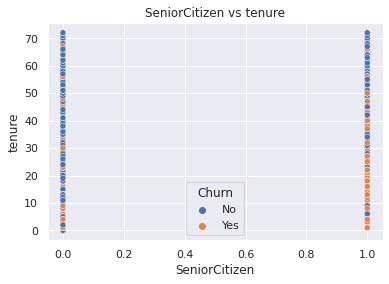

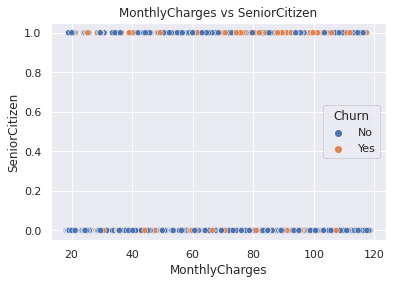

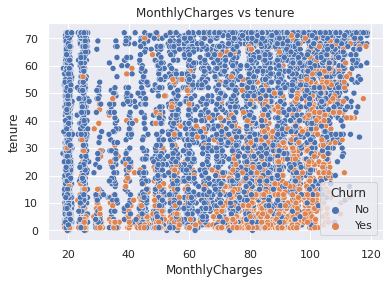

In [ ]:
# See the relationship of data distribution between TotalCharges VS tenure, MonthlyCharges VS tenure and MonthlyCharges VS tenure based on churn targets

# Relationship between TotalCharges vs tenure features
sns.scatterplot(x="SeniorCitizen", y = "tenure" , hue="Churn",  data = data)
plt.title('SeniorCitizen vs tenure')
plt.show()

# Relationship between MonthlyCharges vs tenure features
sns.scatterplot(x="MonthlyCharges", y = "SeniorCitizen" , hue="Churn",  data = data)
plt.title('MonthlyCharges vs SeniorCitizen')
plt.show()

# Relationship between MonthlyCharges vs TotalCharges features
sns.scatterplot(x="MonthlyCharges", y = "tenure" , hue="Churn",  data = data)
plt.title('MonthlyCharges vs tenure')
plt.show()


Based on the results of the scatterplot visualization between numerical value features, some information is obtained as follows:
1. The relationship between the SeniorCitizen feature and tenure, shows that senior customers who have been subscribed for a long time do not really have a relationship that influences the fluctuating value with the number of customers each month. It can be seen from the data visualization that the data does not gather to form a linear line, meaning that even if the customer is already a senior, it cannot affect the monthly number of customers they do.
2. The relationship between the MonthlyCharges feature and SeniorCitizen, shows that the amount charged to customers each month does not have a mutually influential relationship with fluctuating values ​​with senior customers who have been subscribed for a long time. Separated from data visualization, they do not stack up to form a linear line, meaning that even if the customer is a senior, it cannot affect the number of monthly bills paid.
3. The relationship between the MonthlyCharges feature and tenure shows that the amount charged to customers each month affects the amount of each month's billing. It is separated from the visualization that the data is gathered into one line, meaning that the number of customer charges affects the number of bills each month.

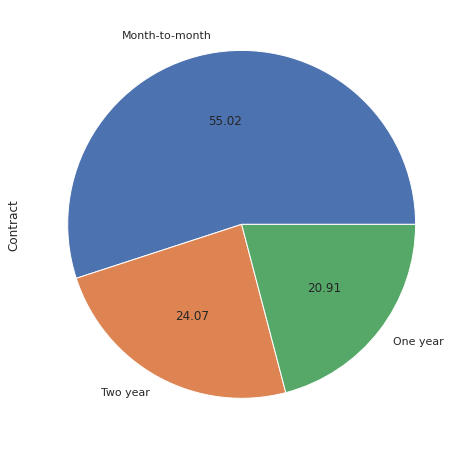

In [ ]:
# Pie diagram visualization of the Contract feature regarding the percentage comparison of customers using the company's services
data['Contract'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%.2f')

Description of Contract Feature Visualization:

The pie chart visualization shows the history of services that customers have done/received based on time. Based on the visualization, it shows that the contract feature dominates the number of customers who receive the company's services, the longest is around a few months, around 55.02%. The second order of contract features dominates the number of customers who receive the company's services, the longest is around two years, around 24.07% and the lowest is the customer using the company's services, which is one year, around 20.91%.

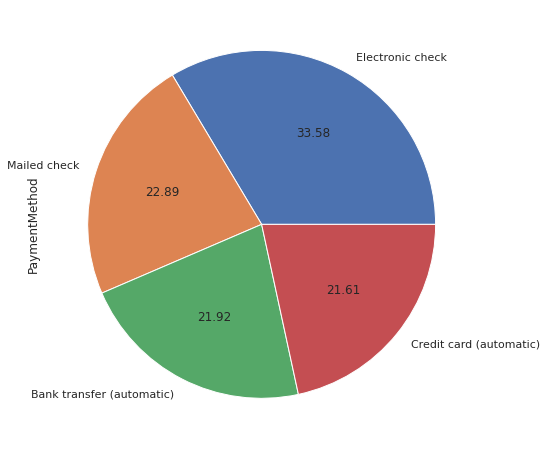

In [ ]:
# Pie chart visualization of the Payment Method feature regarding the percentage of payment methods for the services they receive
data['PaymentMethod'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%.2f')

Description of PaymentMethod Feature Visualization:

The pie chart visualization shows the history of the customer's payment methods for the services they have received. Based on the visualization, it shows that customers more often pay for services using Electronic Check, around 33.58%. The second order as an alternative that is often done by customers in paying for services is the Mailed Check method, around 22.89% and the lowest is using the Bank Transfer payment method around 21.92% and the last lowest order using the credit card payment method is around 21.61%.

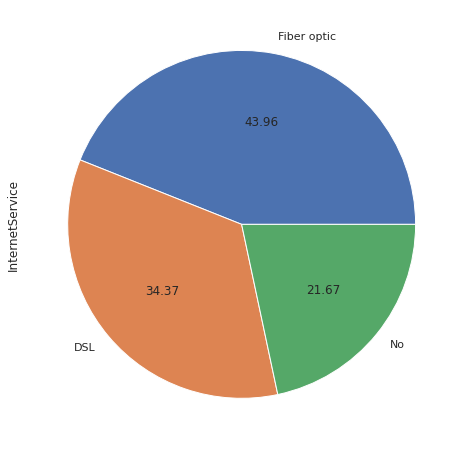

In [ ]:
# Pie chart visualization of Internet Service features regarding the percentage of internet type services that customers can choose from
data['InternetService'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%.2f')

Description of InternetService Feature Visualization:

InternetService : Customer internet service provider (DSL, Fiber optic, No)

The pie chart visualization shows the customer's internet service provider history. Based on the visualization, it shows that customers often subscribe to Fiber Optic internet, around 43.96%%. The second order as an alternative internet service for customer needs in the form of DSL is around 34.37% and the lowest is not using any internet service around 21.67%.

In [ ]:
# See the comparison of streamingTV features with StreamingMovies against the number of MonthlChargers each month
print(data.groupby(by=['StreamingTV'])['MonthlyCharges'].mean().sort_values(), '\n')
print(data.groupby(by=['StreamingMovies'])['MonthlyCharges'].mean().sort_values(), '\n')

StreamingTV
No internet service    21.079194
No                     65.387687
Yes                    88.736738
Name: MonthlyCharges, dtype: float64 

StreamingMovies
No internet service    21.079194
No                     65.434147
Yes                    88.475714
Name: MonthlyCharges, dtype: float64 



Based on the comparison of the amount charged to subscribers every month, for streaming TV subscriptions the highest monthly bill is 88.73 dollars, for Movie subscriptions the highest monthly bill is 88.47 dollars. So the amount of streaming TV bills is more expensive than Streaming Movies.

In [ ]:
# See the comparison of the OnlineSecurity feature with OnlineBackup against the number of MonthlChargers each month
print(data.groupby(by=['OnlineSecurity'])['MonthlyCharges'].mean().sort_values(), '\n')
print(data.groupby(by=['OnlineBackup'])['MonthlyCharges'].mean().sort_values(), '\n')

OnlineSecurity
No internet service    21.079194
No                     75.693067
Yes                    78.838732
Name: MonthlyCharges, dtype: float64 

OnlineBackup
No internet service    21.079194
No                     71.938002
Yes                    83.081597
Name: MonthlyCharges, dtype: float64 



Based on the comparison of the amount charged to customers every month, for customers with the largest online security, the monthly bill is 78.83 dollars, for online backup to services the largest monthly bill is 83.08 dollars. So that the number of online backup bills is more expensive than if you only use online security, because if there is an interruption it can be duplicated so that you still continue to receive services that are customer concerns.

In [ ]:
# View the duration of the customer with the option to use the payment method
print(data.groupby(by=['Contract'])['PaymentMethod'].value_counts(normalize = True))

Contract        PaymentMethod            
Month-to-month  Electronic check             0.477419
                Mailed check                 0.230452
                Bank transfer (automatic)    0.152000
                Credit card (automatic)      0.140129
One year        Credit card (automatic)      0.270197
                Bank transfer (automatic)    0.265445
                Electronic check             0.235574
                Mailed check                 0.228785
Two year        Credit card (automatic)      0.342773
                Bank transfer (automatic)    0.332743
                Mailed check                 0.225369
                Electronic check             0.099115
Name: PaymentMethod, dtype: float64


Based on the comparison of the payment method for each duration of subscription in using the company's services. For customers who use the service for several months, the electronic check payment method more often uses around 0.477. For customers who use the service for one year, more often use the Credit card payment method around 0.270. For customers who use the service for two years, the credit card payment method is more often around 0.342.

In [ ]:
# View the types of internet available with the option of using the payment method
print(data.groupby(by=['InternetService'])['PaymentMethod'].value_counts(normalize = True))

InternetService  PaymentMethod            
DSL              Electronic check             0.267658
                 Mailed check                 0.253201
                 Credit card (automatic)      0.245353
                 Bank transfer (automatic)    0.233788
Fiber optic      Electronic check             0.515181
                 Bank transfer (automatic)    0.208656
                 Credit card (automatic)      0.192829
                 Mailed check                 0.083333
No               Mailed check                 0.485583
                 Bank transfer (automatic)    0.217562
                 Credit card (automatic)      0.216907
                 Electronic check             0.079948
Name: PaymentMethod, dtype: float64


Based on the comparison of payment methods against several types of customer internet service providers. For customers who use DSL internet, the electronic check payment method more often uses around 0.267. For customers who use Fiber optic internet, they use the Electronic payment method more often around 0.515. For customers who do not use any type of internet service, they often use the Mailed check payment method around 0.485.

In [ ]:
# View the amount of deferred income per month and the number of bills each month regarding the customer's desire to extend or not
eda1 = data.groupby('Churn').sum()[['tenure','MonthlyCharges']]
eda1 

,tenure,MonthlyCharges
Churn,,
No,194387,316985.75
Yes,33603,139130.85


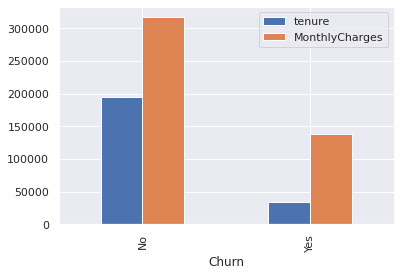

In [ ]:
# Visualization of eda1 variables
sns.set_theme(style="darkgrid")
eda1.plot(kind='bar')

Based on the results of the bar chart visualization of the query results, it shows that customers who do not extend the use of the company's services for the number of months the customer has stayed at the company are around 194,387 dollars and the amount charged to customers every month is around 316,985.75 dollars. Meanwhile, customers who continue to use the company's services for the number of months they have stayed with the company are around 33,603 dollars and the amount charged to customers every month is around 139,130.85 dollars. If it is seen that customers who do not extend their services, the amount of income is large enough if they can return, this can be an evaluation for the company to improve the system so that many customers retain service, so that it can provide a large enough income for business companies.

In [ ]:
# Descriptive statistical results on numerical features
data.describe()[1:].T.style.background_gradient(cmap='Greens_r')

,mean,std,min,25%,50%,75%,max
SeniorCitizen,0.162147,0.368612,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
TotalCharges,2283.300441,2266.771362,18.800000,401.450000,1397.475000,3794.737500,8684.800000


Descriptive statistical information or central tendency (mean, standard deviation, minimum, quartile and maximum) Telco Customer Churn dataset:

1. The company's average income from the number of months of regular customers is around 32.37 dollars and the largest amount of income is around 72%.
2. The company's average income from the amount charged to customers every month is around 64.76 dollars and the largest amount of income is around 188.75%.
Based on this, it can be an evaluation for the company to always be as much as possible so that their income is around the maximum amount, not the minimum amount.
3. The total amount charged to the largest customer to be paid is about 8684 dollars, this amount is quite good for the company's profits, can increase revenue internally.

EDA visualization reference sources: 1. [Pie chart Visualization link](https://www.kaggle.com/code/sidart101/pima-indians-diabetes-eda-prediction), 2. [Bar chart visualization link](https://www.kaggle.com/code/jbanerje/telco-customer-churn-eda-and-classification)

#5 - Data Preprocessing

> This section contains the process of preparing data for the model training process, such as dividing the data into train-dev-test, data transformation (normalization, encoding, etc.), and other necessary processes.

## 5a - Data Inference

The inference model is data that is not available in the dataset, if the searched data does not exist, then new data is entered. So the inference model is new data that is not in the data set. Data inference uses existing datasets. The dataset is divided into two, namely inference set and non inference set (Train set & Test set)

In [ ]:
# Get Data for Model Inference
# It is assumed that there are 10 Churns that are not in the Telco Customer Churn dataset
datainfernce = data.sample(10, random_state=10) 
datainfernce 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6418,2486-WYVVE,Male,0,Yes,No,31,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,79.30,2484.00,No
1948,8183-ONMXC,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,80.75,159.45,Yes
4497,0575-CUQOV,Male,1,Yes,No,60,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,97.95,5867.00,No
66,8627-ZYGSZ,Male,0,Yes,No,47,Yes,Yes,Fiber optic,No,...,No,No,No,No,One year,Yes,Electronic check,78.90,3650.35,No
1705,4918-FYJNT,Female,1,Yes,No,55,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,No,Electronic check,90.45,5044.80,No
924,4824-GUCBY,Female,1,No,No,22,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,81.70,1820.90,No
1051,3845-JHAMY,Female,0,Yes,Yes,16,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),35.50,552.70,No
7012,6691-CCIHA,Female,0,Yes,No,62,Yes,Yes,DSL,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Electronic check,84.95,5150.55,No
3723,7010-ZMVBF,Female,0,Yes,Yes,18,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,357.00,No
4590,4884-TVUQF,Female,1,No,No,57,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),101.30,5779.60,No


From a collection of information on the Telco Customer Churn dataset, there are 10 data that are allegedly not included in the dataset or are contained in the data inference section.

In [ ]:
# Delete Inference Set from Telco Customer Churn Dataset
data_train_test = data.drop(datainfernce.index)
data_train_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
data.shape

(7043, 21)

Before separating the inference data from that dataset, the number of the initial Telco Customer Churn dataset has 7043 rows and then removing/separating the inference data from the Telco Customer Churn dataset changes to 7033 rows.

In [ ]:
# Reset Index
# In order to avoid unwanted occurrences, the data is reset its index for sequencing

data_train_test.reset_index(drop=True, inplace=True)
datainfernce.reset_index(drop=True, inplace=True)
datainfernce

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2486-WYVVE,Male,0,Yes,No,31,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,79.30,2484.00,No
1,8183-ONMXC,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,80.75,159.45,Yes
2,0575-CUQOV,Male,1,Yes,No,60,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,97.95,5867.00,No
3,8627-ZYGSZ,Male,0,Yes,No,47,Yes,Yes,Fiber optic,No,...,No,No,No,No,One year,Yes,Electronic check,78.90,3650.35,No
4,4918-FYJNT,Female,1,Yes,No,55,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,No,Electronic check,90.45,5044.80,No
5,4824-GUCBY,Female,1,No,No,22,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,81.70,1820.90,No
6,3845-JHAMY,Female,0,Yes,Yes,16,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),35.50,552.70,No
7,6691-CCIHA,Female,0,Yes,No,62,Yes,Yes,DSL,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Electronic check,84.95,5150.55,No
8,7010-ZMVBF,Female,0,Yes,Yes,18,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,357.00,No
9,4884-TVUQF,Female,1,No,No,57,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),101.30,5779.60,No


In the data inference section, the index is not sorted because it adjusts the location of the rows of data that are not included in the Telco Customer Churn dataset, but after resetting the index, the index number is arranged. Restart the index, so that when it is run down or the process is complete, if there is an error in the results, it is certain that it is not because the index is messy or irregular.

##5b. - Splitting Datasets

Splitting Data is a split to make X as a feature and Y as a target into Train/validation. Train/validationsplit as a method that can be used to evaluate the performance of machine learning models.

In [ ]:
# Separation of `X` (Feature) and `y` (Target)

# Delete column axis=1 Churn, to be included and divided into train/test
X = data_train_test.drop('Churn', axis=1) 
# Create y variable for Churn target column only
y = data_train_test['Churn']

In [ ]:
# Separate between Train-Set, validation and Test-Set (if you want to make data inference)
# The use of test-set can be changed to validation, because X_test is not converted to inference
# Entering x and y values, test_size means split 80% for train, and 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=10)
print('Train Size : ', X_train.shape)
print('Validation Size : ', X_val.shape)

Train Size :  (5626, 20)
Validation Size :  (1407, 20)


The process of deleting the Churn target column is carried out to be transferred as a training set and validation set, from the Telco Customer Churn data that has been transferred and then a train_test_split process will be carried out, with 80% of the income group going to X_tarin and 20% going to y_train. X_train uses 5626(80%) of 7043 rows and validation uses 1407(remaining 20%) of 7043 rows.

## 5c - Feature Selection

Feature selection or feature selection by reducing the number of irrelevant features to determine the target class. The feature selector can use a heatmap, looking for the correlation value between the feature column and the target column as high as possible or as low as possible. Looking for a correlation that is close to 1 if the value is zero, it can be dropped because there is no correlation between the feature column and the target column. Desired targets must have a correlation.

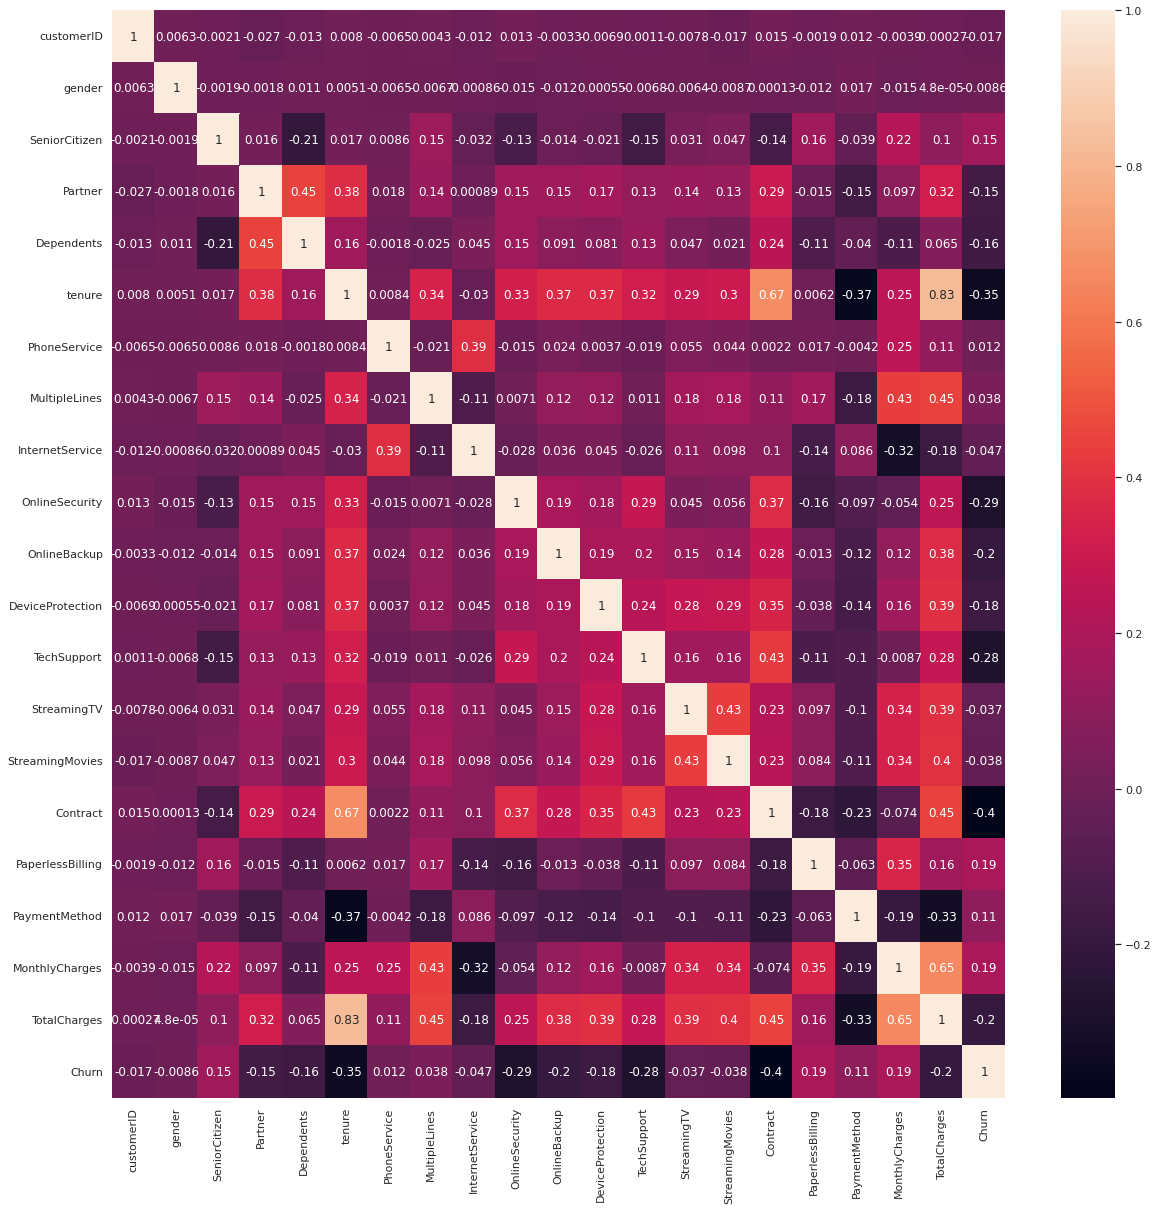

In [ ]:
# See the Correlation between Features and Churn targets
# Change the features to categorical first in order to calculate the correlation of some features to the target
FeatureEncoded = data.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
plt.figure(figsize =(20,20))
correlation=FeatureEncoded[FeatureEncoded.columns].corr()
sns.heatmap(correlation,annot=True)


Based on the Churn correlation value with 21 features that are thought to affect, that there are features SeniorCitizen, PhoneService, Multiplelines, PaperlessBilling, PaymentMethod, MonthyCharges and TotalCharges have a positive correlation value, meaning that the relationship between features and targets move in the same direction together. There is also a negative feature correlation, meaning that the feature and target move in opposite directions. But to be more convincing, the feature importances process is carried out using the chi-square method, to see the highest feature score in influencing the churn target.

In [ ]:
# Change the categorical data first to numeric in order to calculate the score for each feature
encoder = LabelEncoder() 
X['customerID'] = encoder.fit_transform(X['customerID'])
X['gender'] = encoder.fit_transform(X['gender'])
X['Partner'] = encoder.fit_transform(X['Partner'])
X['Dependents'] = encoder.fit_transform(X['Dependents'])
X['PhoneService'] = encoder.fit_transform(X['PhoneService'])
X['MultipleLines'] = encoder.fit_transform(X['MultipleLines'])
X['InternetService'] = encoder.fit_transform(X['InternetService'])
X['OnlineSecurity'] = encoder.fit_transform(X['OnlineSecurity'])
X['OnlineBackup'] = encoder.fit_transform(X['OnlineBackup'])
X['DeviceProtection'] = encoder.fit_transform(X['DeviceProtection'])
X['TechSupport'] = encoder.fit_transform(X['TechSupport'])
X['PhoneService'] = encoder.fit_transform(X['PhoneService'])
X['MultipleLines'] = encoder.fit_transform(X['MultipleLines'])
X['StreamingTV'] = encoder.fit_transform(X['StreamingTV'])
X['StreamingMovies'] = encoder.fit_transform(X['StreamingMovies'])
X['Contract'] = encoder.fit_transform(X['Contract'])
X['PaperlessBilling'] = encoder.fit_transform(X['PaperlessBilling'])
X['PaymentMethod'] = encoder.fit_transform(X['PaymentMethod'])
X['TotalCharges'] = encoder.fit_transform(X['TotalCharges'])

In [ ]:
#k=12 tells the top twelve features to choose from
# The Chi2 Score function tells which feature to choose using Chi Square
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
fit.scores_

array([2.59901701e+03, 2.60283707e-01, 1.35987481e+02, 8.17890634e+01,
       1.33047466e+02, 1.62445108e+04, 9.54866099e-02, 9.99634346e+00,
       9.88646534e+00, 5.51208062e+02, 2.29131954e+02, 1.90764834e+02,
       5.22366979e+02, 7.45970952e+00, 8.27579806e+00, 1.11520296e+03,
       1.05998582e+02, 5.87972548e+01, 3.68947688e+03, 4.58468019e+05])

In [ ]:
# The score of each feature in influencing the Chrun target
chi = pd.Series(fit.scores_)
chi.index = X.columns
chi.sort_values(ascending=False)

TotalCharges        458468.019274
tenure               16244.510824
MonthlyCharges        3689.476876
customerID            2599.017012
Contract              1115.202957
OnlineSecurity         551.208062
TechSupport            522.366979
OnlineBackup           229.131954
DeviceProtection       190.764834
SeniorCitizen          135.987481
Dependents             133.047466
PaperlessBilling       105.998582
Partner                 81.789063
PaymentMethod           58.797255
MultipleLines            9.996343
InternetService          9.886465
StreamingMovies          8.275798
StreamingTV              7.459710
gender                   0.260284
PhoneService             0.095487
dtype: float64

The value of the feature score that is suspected of influencing Churn payments produces values from the largest to the highest. Based on the feature score, I chose the top 12 features without a customer ID, namely TotalCharges, tenure, MonthlyCharges, Contract, OnlineSecurity, TechSupport, OnlineBackup, DeviceProtection, SeniorCitizen, Dependents, PaperlessBilling and Partners. And features that have a low score in affecting Churn will be removed.

In [ ]:
# Remove unused features, only use features that are suspected of affecting the target
X_train.drop(['customerID','PaymentMethod','MultipleLines','InternetService','StreamingMovies',
              'StreamingTV','gender','PhoneService'], axis=1, inplace=True)
X_val.drop(['customerID','PaymentMethod','MultipleLines','InternetService','StreamingMovies',
              'StreamingTV','gender','PhoneService'], axis=1, inplace=True)

Based on feature selection, features that are not used will be immediately dropped or removed. The feature with a low score will not be used because it is suspected that it is not very good at influencing the churn target.

## 5d - Handling Missing Value

Quoted from file.upi.edu.com, Missing value is information that is not available for an object (case). Missing value occurs because information for something about the object is not provided, is difficult to find, or simply does not exist. In this process, we will check the missing value data with .info() first:

In [ ]:
# Add new data to empty rows with median value
X_train['TotalCharges'].fillna(X_train['TotalCharges'].median(), inplace=True)
X_val['TotalCharges'].fillna(X_val['TotalCharges'].median(), inplace=True)

In [ ]:
# Check Values on X_train
X_train.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [ ]:
# Check Missing Values on X_val
X_val.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [ ]:
# Check Missing Values on y_train
y_train.isnull().sum()

0

In [ ]:
# Check Missing Values on y_val
y_val.isnull().sum()

0

Previously there was a missing value in the TotalCharges feature. After handling the missing value, the X_train, X_val, y_train and y_val variables indicate that there is no missing value, which means it is clean from Nan data. Next will be handling outliers

## 5e - Handling Outliers

To deal with outlier values, I chose the Censoring method. Censoring or capping, serves to limit the distribution of the maximum or minimum on an arbitrary value. Rescale to fit into the boxplot. I did not choose the Trimming or deletion method, so that the dimensions of the metric size remain the same and the amount of data is still maintained.

In [ ]:
# Function to create histograms and boxplots.
# This function takes the census_adult_income dataframe and the desired variable as arguments.

def diagnostic_plots(data, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

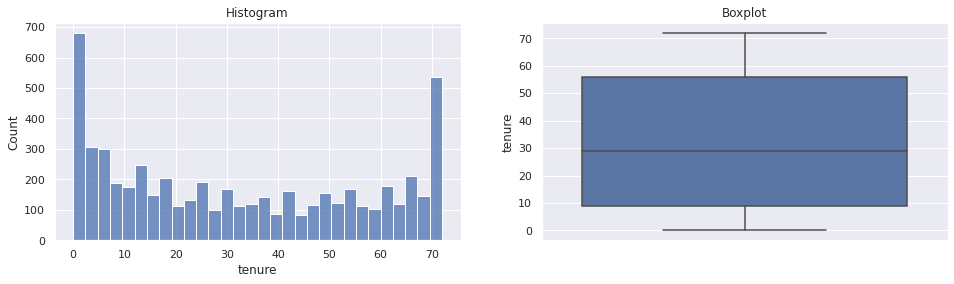


Skewness Value tenure X_train:  0.2395902337650824


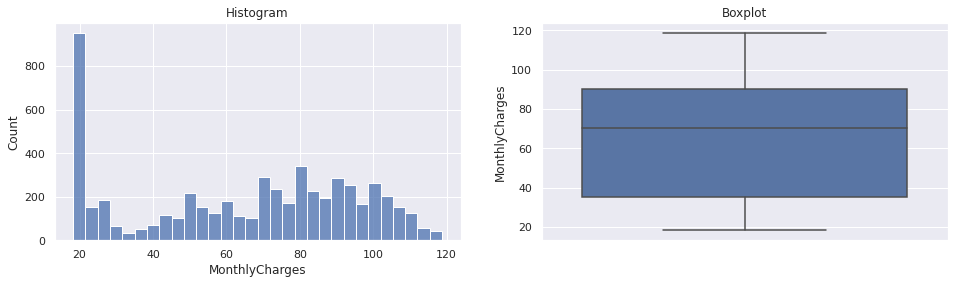


Skewness Value MonthlyCharges X_train:  -0.22565575694865567


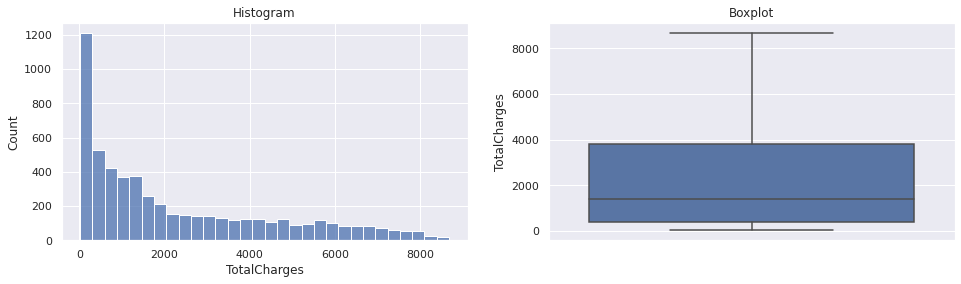


Skewness Value TotalCharges X_train:  0.9641204114423659


In [ ]:
# Check distribution of features and outliers using Boxplot

diagnostic_plots(X_train, 'tenure')
print('\nSkewness Value tenure X_train: ', X_train['tenure'].skew())

diagnostic_plots(X_train, 'MonthlyCharges')
print('\nSkewness Value MonthlyCharges X_train: ', X_train['MonthlyCharges'].skew())

diagnostic_plots(X_train, 'TotalCharges')
print('\nSkewness Value TotalCharges X_train: ', X_train['TotalCharges'].skew())

It is said to be normally distributed when the value of the skewness ratio is in the range of -2 to 2. The three numeric data features are tenure, MonthlyCharges and TotalCharges, all data are normally distributed because they have skewness values according to the standard. Boxplot visualization of numerical data features in the form of tenure, MonthlyCharges and TotalCharges, there are no outliers in the upper boxplot and lower boxplot/top and bottom of the boxplot. So there is no need to look for the IQR value to equalize the range of values to enter the boxplot.

In [ ]:
# Obtained X_train and X_val which have been checked feature engineering
# X_train and X_val variables are cleared of Missing Values and Outliers
X_train

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
6126,1,No,No,6,No,No,No,No,Month-to-month,No,44.70,276.50
6582,0,No,No,2,No,No,No,No,Month-to-month,Yes,69.80,134.70
2708,0,No,No,1,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,20.45,20.45
6140,0,No,No,69,Yes,Yes,No,Yes,Two year,Yes,66.90,4577.90
5184,0,No,Yes,60,No internet service,No internet service,No internet service,No internet service,Two year,No,19.95,1189.90
...,...,...,...,...,...,...,...,...,...,...,...,...
1180,0,Yes,No,53,No,No,No,Yes,One year,Yes,93.45,4872.20
3441,0,No,No,58,Yes,Yes,Yes,No,One year,Yes,107.75,6332.75
1344,0,No,No,19,No internet service,No internet service,No internet service,No internet service,Two year,Yes,19.95,373.50
4623,0,No,No,5,No,No,Yes,No,Month-to-month,Yes,92.50,452.70


So that new variables are obtained in the form of X_train and X_val which are clean from missing values and outliers.

## 5f - Numerical and Categorical Column Separation

The two types of data are Telco Customer Churn, that there are differences in the data characteristics of each feature, therefore it must be separated.

In [ ]:
# Separate categorical Numerical data and categorical data
# There are categorical features with numeric values, so manual separation is carried out for more precise numerical and categorical separation

# numerik_col = X_train._get_numeric_data().columns.tolist()
numerik_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
# kategorik_col = X_train.select_dtypes(include=['object']).columns.tolist()
kategorik_col = ['SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']

print('Numeric Columns     : ', numerik_col)
print('Categorical Columns : ', kategorik_col)

Numeric Columns     :  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns :  ['SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']


The separation process is carried out according to the type of data from each feature, it is identified that all feature columns are numeric columns. And no column goes into categorization.

## 5g - Feature Scaling, Feature Encoding dan Feature Imbalence

In [ ]:
# Feature scaling for numeric data
std = StandardScaler()
X_train_std = std.fit_transform(X_train[numerik_col])
X_val_std = std.transform(X_val[numerik_col])

Feature Scaling on X_train and X_val by making numerical data in the dataset have the same range of values (scale). No more data features that dominate other data features.

In [ ]:
# Feature encoding for categorical data
encoder = OneHotEncoder()
X_train_enc = encoder.fit_transform(X_train[kategorik_col]).toarray()
X_val_enc = encoder.transform(X_val[kategorik_col]).toarray()

Feature encoding is the process of converting categorical data to be converted into numeric/number form, because deep learning cannot process a string. So it must be changed to a number in the form of a float.

In [ ]:
# Target encoding for categorical data
# For Y Train
target = LabelEncoder()
y_train_final = pd.DataFrame(target.fit_transform(y_train))
y_val_final = pd.DataFrame(target.transform(y_val))

Churn target type object or categorical has no value, therefore the encoding process is carried out. So that the Y_train data can be numeric, so that calculations can be processed.

In [ ]:
# Combine numeric columns with categorical columns
X_train_final = pd.DataFrame(np.concatenate([X_train_std,X_train_enc], axis=1))
X_val_final = pd.DataFrame(np.concatenate([X_val_std,X_val_enc], axis=1))

Numeric columns that have standardized ranges and categorical columns that have standardized ranges will be combined back into one table for further analysis.

In [ ]:
# Feature Imbalance to equalize the size of the target shape data
smote = SMOTE(k_neighbors=5, random_state=10)
X_train_imbalanceed, y_train_imbalanceed = smote.fit_resample(X_train_final,y_train_final)
X_val_imbalanceed, y_val_imbalanceed = smote.fit_resample(X_val_final,y_val_final)

In [ ]:
y_train_imbalanceed.value_counts()

0    4124
1    4124
dtype: int64

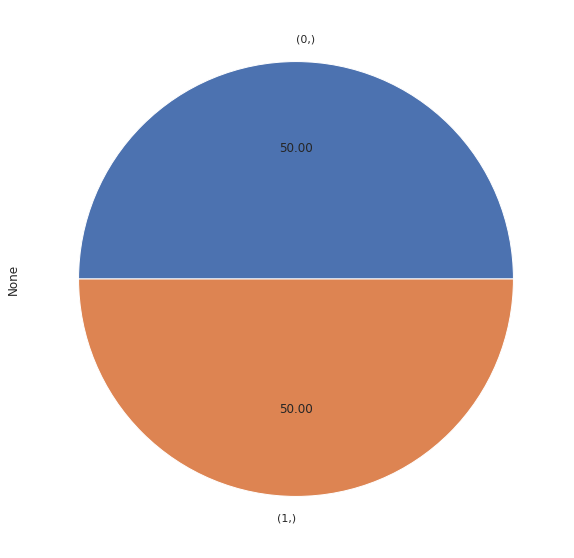

In [ ]:
# Visualization of pie charts regarding service status targets for Churn . customers
# View classes from Telco Customer Churn
y_train_imbalanceed.value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f')

In [ ]:
y_val_imbalanceed.value_counts()

0    1041
1    1041
dtype: int64

Based on the pie chart visualization, the comparison of class No is more dominant at 73.5% while the Yes class is 26.5% less. Because the target data is not balanced, then the feature offset process is carried out, so that the values between features can be compared equally between classes or have the same proportions, so that the model evaluation process can be maximized.

#6 - Model Definition

> This section contains cells to define the model. Explain the reasons for using an algorithm/model, the hyperparameters used, the types of metrics used, and other things related to the model.

In [ ]:
# Process data pipeline
# Using the data pipeline, where the data is entered into the pipeline function so that it can run simultaneously
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_imbalanceed, y_train_imbalanceed))
training_batches= train_dataset.shuffle(buffer_size=1024).batch(64)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_imbalanceed, y_val_imbalanceed))
validation_batches = val_dataset.shuffle(buffer_size=1024).batch(64)

Pipelines are used to run data into the model simultaneously, where X_train and y_train will make the condition move train data simultaneously in one pass, as well as X_val and y_val. Process tf.data as a condition step to evaluate the condition of the step property to judge which action to take next in the pipeline, by setting the buffer_size to 1024 and batch size to 64.

In [ ]:
# Model definition for layers using relu activation and output using sigmoid activation
modelsig1 = tf.keras.models.Sequential()
modelsig1.add(tf.keras.layers.Dense(26, input_shape=(26,),activation='relu'))
modelsig1.add(tf.keras.layers.Dense(13,activation='relu'))
modelsig1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

modelsig1.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

Building the ANN model using the input input layer configuration, then the hidden layer and the output output. Since I have 26 onehotencoder results from 12 input features, I will create a first layer with 26 neurons and a 'relu' activation function. Then we will add a second layer with 13 neurons and a 'relu' activation function. Relu activation is closer to the way biological neurons work in classifying outputs. Since the expected output is binary, in the last layer we add only one neuron with a sigmoid activation function. I will use the adam optimizer because it can handle sparse gradients in noisy problems. Loss uses 'binary_crossentropy' because the expected output is binary (churn yes or no) while the evaluation matrix uses accuracy.

In [ ]:
# Model definition for layers using elu activation and output using sigmoid activation
modelsig2 = tf.keras.models.Sequential()
modelsig2.add(tf.keras.layers.Dense(26, input_shape=(26,), activation='elu'))
modelsig2.add(tf.keras.layers.Dense(13,activation='elu'))
modelsig2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

modelsig2.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

Building the ANN model using the input input layer configuration, then the hidden layer and the output output. Since I have 26 onehotencoder results from 12 input features, I will create a first layer with 26 neurons and an 'elu' activation function. Then we will add a second layer with 13 neurons and an 'elu' activation function. ELU activation is more proven to produce more accurate results than RELU and also converges faster. Elu and relu are the same for positive input, but for negative input elu is smooth (to-alpha) while smooth relu is sharp. Since the expected output is binary, in the last layer we add only one neuron with a sigmoid activation function. I will use the adam optimizer because it can handle sparse gradients in noisy problems. Loss uses 'binary_crossentropy' because the expected output is binary (churn yes or no) while the evaluation matrix uses accuracy.

In [ ]:
# Model definition for layers using activation always and output using activation sigmoid
modelsig3 = tf.keras.models.Sequential()
modelsig3.add(tf.keras.layers.Dense(26, input_shape=(26,), activation='selu'))
modelsig3.add(tf.keras.layers.Dense(13,activation='selu'))
modelsig3.add(tf.keras.layers.Dense(1, activation='sigmoid'))

modelsig3.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

Building the ANN model using the input input layer configuration, then the hidden layer and the output output. Since I have 26 onehotencoder results from 12 input features, I'll create a first layer with 26 neurons and an 'always' activation function. Then we will add a second layer with 13 neurons and an 'cell' activation function. Activation always multiplies the scale (> 1) by the output of the previous elu function to ensure the slope is greater than one for positive inputs. Since the expected output is binary, in the last layer we add only one neuron with a sigmoid activation function. I will use the adam optimizer because it can handle sparse gradients in noisy problems. Loss uses 'binary_crossentropy' because the expected output is binary (churn yes or no) while the evaluation matrix uses accuracy.

Based on 3 different model definitions, each layer with a sigmoid activation function output as binary, a comparison of the results of the model evaluation will be carried out later. By looking at which evaluation is the best between the relu activation layer, the elu activation layer is the selu activation layer.

#7 - Model Training

> Cells in this section only contain code to train the model and the resulting output. Perform the training process several times with different hyperparameters to see the results obtained. Analyze and narrate these results in the Model Evaluation section.

In [ ]:
# Conduct training from a defined model with the activation layer being relu and the activation function being sigmoid
relu = modelsig1.fit(training_batches, epochs=100, batch_size=10,validation_data=validation_batches, verbose=1)

Epoch 1/100
129/129 [==============================] - 2s 7ms/step - loss: 0.4761 - accuracy: 0.7841 - val_loss: 0.7274 - val_accuracy: 0.5913
Epoch 2/100
129/129 [==============================] - 1s 5ms/step - loss: 0.5162 - accuracy: 0.7512 - val_loss: 0.6233 - val_accuracy: 0.6782
Epoch 3/100
129/129 [==============================] - 0s 2ms/step - loss: 0.5098 - accuracy: 0.7550 - val_loss: 0.5781 - val_accuracy: 0.7051
Epoch 4/100
129/129 [==============================] - 0s 3ms/step - loss: 0.5063 - accuracy: 0.7582 - val_loss: 0.5573 - val_accuracy: 0.7161
Epoch 5/100
129/129 [==============================] - 0s 3ms/step - loss: 0.5026 - accuracy: 0.7553 - val_loss: 0.5453 - val_accuracy: 0.7205
Epoch 6/100
129/129 [==============================] - 0s 3ms/step - loss: 0.4997 - accuracy: 0.7572 - val_loss: 0.5362 - val_accuracy: 0.7229
Epoch 7/100
129/129 [==============================] - 0s 3ms/step - loss: 0.4988 - accuracy: 0.7616 - val_loss: 0.5295 - val_accuracy: 0.7267

In [ ]:
# Conduct training from a defined model with the activation layer being elu and the activation function being sigmoid
elu = modelsig2.fit(training_batches, epochs=100, batch_size=10,validation_data=validation_batches, verbose=1)

Epoch 1/100
129/129 [==============================] - 1s 4ms/step - loss: 0.4434 - accuracy: 0.7854 - val_loss: 0.8815 - val_accuracy: 0.6359
Epoch 2/100
129/129 [==============================] - 0s 3ms/step - loss: 0.5109 - accuracy: 0.7622 - val_loss: 0.6660 - val_accuracy: 0.7027
Epoch 3/100
129/129 [==============================] - 0s 3ms/step - loss: 0.5063 - accuracy: 0.7564 - val_loss: 0.6209 - val_accuracy: 0.7133
Epoch 4/100
129/129 [==============================] - 0s 2ms/step - loss: 0.5058 - accuracy: 0.7595 - val_loss: 0.5822 - val_accuracy: 0.7233
Epoch 5/100
129/129 [==============================] - 0s 2ms/step - loss: 0.5045 - accuracy: 0.7589 - val_loss: 0.5626 - val_accuracy: 0.7310
Epoch 6/100
129/129 [==============================] - 0s 3ms/step - loss: 0.5044 - accuracy: 0.7541 - val_loss: 0.5494 - val_accuracy: 0.7368
Epoch 7/100
129/129 [==============================] - 0s 3ms/step - loss: 0.5049 - accuracy: 0.7574 - val_loss: 0.5314 - val_accuracy: 0.7344

In [ ]:
# Conduct training from a defined model with the activation layer being always and the activation function being sigmoid
selu = modelsig3.fit(training_batches, epochs=100, batch_size=10,validation_data=validation_batches, verbose=1)

Epoch 1/100
129/129 [==============================] - 1s 4ms/step - loss: 0.4212 - accuracy: 0.7973 - val_loss: 1.0700 - val_accuracy: 0.5908
Epoch 2/100
129/129 [==============================] - 0s 3ms/step - loss: 0.4635 - accuracy: 0.7861 - val_loss: 0.9073 - val_accuracy: 0.6475
Epoch 3/100
129/129 [==============================] - 0s 3ms/step - loss: 0.4807 - accuracy: 0.7752 - val_loss: 0.7726 - val_accuracy: 0.6926
Epoch 4/100
129/129 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.7752 - val_loss: 0.7085 - val_accuracy: 0.7080
Epoch 5/100
129/129 [==============================] - 0s 3ms/step - loss: 0.4915 - accuracy: 0.7695 - val_loss: 0.6658 - val_accuracy: 0.7209
Epoch 6/100
129/129 [==============================] - 0s 2ms/step - loss: 0.4790 - accuracy: 0.7705 - val_loss: 0.7072 - val_accuracy: 0.7157
Epoch 7/100
129/129 [==============================] - 0s 3ms/step - loss: 0.4849 - accuracy: 0.7719 - val_loss: 0.6905 - val_accuracy: 0.7137

#8 - Model Evaluation

> In this section, an evaluation of the model is carried out which should show how the model performs based on the selected metrics. This should be demonstrated by visualizing the performance trend and/or model error rate. Perform analysis related to the results on the model and write down the results of the analysis.

## 8a - Model Evaluation Activation layer relu

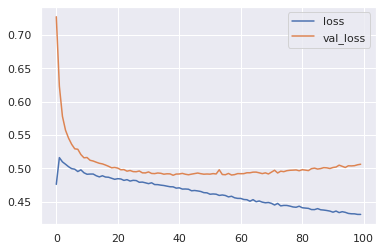

In [ ]:
# Comparison plot between loss value and validation loss
metrics = pd.DataFrame(relu.history)
metrics[['loss', 'val_loss']].plot()

Based on the metrics model, an underfit data plot is generated, where there is a fairly large sparse range between loss and validation loss, so it can be said that modelsig1 does not work well in predicting data for target churn results.

In [ ]:
# Performance Accuracy Model definition modelsig1
y_train_pred_relu = modelsig1.predict(X_train_imbalanceed)
y_val_pred_relu = modelsig1.predict(X_val_imbalanceed)
y_train_pred_relu = np.where (y_train_pred_relu > 0.5, 1,0)
y_val_pred_relu = np.where (y_val_pred_relu > 0.5, 1,0)
# classification model to predict opportunities that occur using X_train and X_val
print('classification report Train Set')
print(classification_report(y_train_imbalanceed,y_train_pred_relu))
print('                                  ')
print('classification report validation Set')
print(classification_report(y_val_imbalanceed,y_val_pred_relu))

classification report Train Set
              precision    recall  f1-score   support

           0       0.91      0.64      0.75      4124
           1       0.72      0.94      0.82      4124

    accuracy                           0.79      8248
   macro avg       0.82      0.79      0.78      8248
weighted avg       0.82      0.79      0.78      8248

                                  
classification report validation Set
              precision    recall  f1-score   support

           0       0.83      0.62      0.71      1041
           1       0.70      0.87      0.78      1041

    accuracy                           0.75      2082
   macro avg       0.76      0.75      0.74      2082
weighted avg       0.76      0.75      0.74      2082



Based on the results of the evaluation model with activation layer relu is not the best algorithm.

## 8b - Model Evaluation Activation layer elu

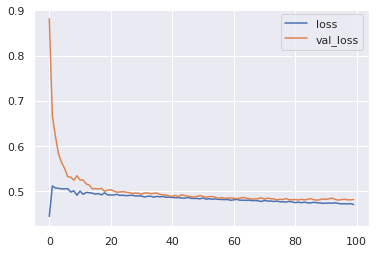

In [ ]:
# Comparison plot between loss value and validation loss
metrics = pd.DataFrame(elu.history)
metrics[['loss', 'val_loss']].plot()

Based on the metrics model, a good fit data plot is produced, where there is a sparse range that does not differ from each other between loss and validation loss, so it can be said that modelsig2 works well in predicting data for target churn results.

In [ ]:
# Performance Accuracy Model definition modelsig2
y_train_pred_elu = modelsig2.predict(X_train_imbalanceed)
y_val_pred_elu = modelsig2.predict(X_val_imbalanceed)
y_train_pred_elu = np.where (y_train_pred_elu > 0.5, 1,0)
y_val_pred_elu = np.where (y_val_pred_elu > 0.5, 1,0)
# classification model to predict opportunities that occur using X_train and X_val
print('classification report Train Set')
print(classification_report(y_train_imbalanceed,y_train_pred_elu))
print('                                  ')
print('classification report Validation Set')
print(classification_report(y_val_imbalanceed,y_val_pred_elu))

classification report Train Set
              precision    recall  f1-score   support

           0       0.86      0.66      0.74      4124
           1       0.72      0.89      0.80      4124

    accuracy                           0.78      8248
   macro avg       0.79      0.78      0.77      8248
weighted avg       0.79      0.78      0.77      8248

                                  
classification report Validation Set
              precision    recall  f1-score   support

           0       0.83      0.65      0.73      1041
           1       0.71      0.86      0.78      1041

    accuracy                           0.76      2082
   macro avg       0.77      0.76      0.75      2082
weighted avg       0.77      0.76      0.75      2082



Based on the results of the evaluation model with the activation layer, you are the best algorithm.

**classification report y_train**, where customers do not extend their subscription churn (0/class no) or continue to extend their subscription churn (1/class yes). Recall 0 from the comparison of companies losing customers who are no longer using the services/products of the company is 0.66, meaning that customers who do not renew their subscriptions for the future, or customers stop the service because they no longer need the service function, feel dissatisfied based on their usage experience. , unable to pay the bill, there are other subscriptions that are more attractive, the overall accumulation of not renewing the service is 66%.

Recall 1 from the comparison of companies found that customers who continue to use the services/products of the company are 0.89, meaning that customers continue to renew their subscriptions for the future, or customers still need the company's services, are still satisfied with the company's services/products, are still able to pay the bill. , the overall accumulation continues to extend the service by 89%%.

**classification report y_val**, where customers do not extend their subscription churn (0/class no) or keep extending their subscription churn (1/class yes). Recall 0 from the comparison of companies losing customers who are no longer using the services/products of the company is 0.65, meaning that customers who do not renew their subscriptions for the future, or customers stop the service because they no longer need the service function, feel dissatisfied based on their usage experience. , unable to pay the bill, there are other subscriptions that are more attractive, the overall accumulation does not renew the service by 65%.

Recall 1 from the comparison of companies found that customers who continue to use the services/products of the company are 0.86, meaning that customers continue to renew their subscriptions for the future, or customers still need the company's services, are still satisfied with the company's services/products, are still able to pay the bill. , the overall accumulation continues to extend the service by 86%%.

This can be a consideration for service provider companies to further improve performance, so that customers can continue to continue to use services. Or you can provide various types of services so that customers like them so that the company will continue to get good customers for the company's internal income.

## 8c - Model Evaluation Activation layer selu

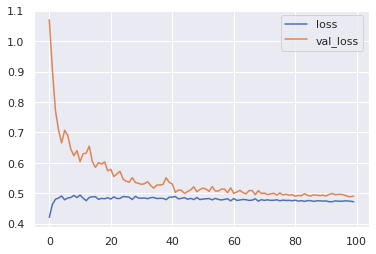

In [ ]:
# Comparison plot between loss value and validation loss
metrics = pd.DataFrame(selu.history)
metrics[['loss', 'val_loss']].plot()

Based on the metrics model, an underfit data plot is generated, where there are rare ranges that differ from each other between loss and validation loss, it can be seen that the validation loss form fluctuates up and down and is not parallel to the loss, so it can be said that modelsig3 does not work well in predicting data. for target churn hasil

In [ ]:
# Performance Accuracy Model definition modelsig3
y_train_pred_selu = modelsig3.predict(X_train_imbalanceed)
y_val_pred_selu = modelsig3.predict(X_val_imbalanceed)
y_train_pred_selu = np.where (y_train_pred_selu > 0.5, 1,0)
y_val_pred_selu = np.where (y_val_pred_selu > 0.5, 1,0)
# classification model to predict opportunities that occur using X_train and X_val
print('classification report Train Set')
print(classification_report(y_train_imbalanceed,y_train_pred_selu))
print('                                  ')
print('classification report Train Set')
print(classification_report(y_val_imbalanceed,y_val_pred_selu))

classification report Train Set
              precision    recall  f1-score   support

           0       0.87      0.65      0.74      4124
           1       0.72      0.90      0.80      4124

    accuracy                           0.77      8248
   macro avg       0.79      0.77      0.77      8248
weighted avg       0.79      0.77      0.77      8248

                                  
classification report Train Set
              precision    recall  f1-score   support

           0       0.84      0.64      0.72      1041
           1       0.71      0.88      0.78      1041

    accuracy                           0.76      2082
   macro avg       0.77      0.76      0.75      2082
weighted avg       0.77      0.76      0.75      2082



Based on the results of the evaluation model with the activation layer, it is not always the best algorithm.

#9 - Model Saving

> By looking at the results of the model evaluation, choose the best model to save. This best model will be reused in deploying Heroku.

In [ ]:
modelsig1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                702       
                                                                 
 dense_1 (Dense)             (None, 13)                351       
                                                                 
 dense_2 (Dense)             (None, 1)                 14        
                                                                 
Total params: 1,067
Trainable params: 1,067
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelsig2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 26)                702       
                                                                 
 dense_4 (Dense)             (None, 13)                351       
                                                                 
 dense_5 (Dense)             (None, 1)                 14        
                                                                 
Total params: 1,067
Trainable params: 1,067
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelsig3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 26)                702       
                                                                 
 dense_7 (Dense)             (None, 13)                351       
                                                                 
 dense_8 (Dense)             (None, 1)                 14        
                                                                 
Total params: 1,067
Trainable params: 1,067
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Freezing model parameters
modelsig2.trainable = False
modelsig2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 26)                702       
                                                                 
 dense_4 (Dense)             (None, 13)                351       
                                                                 
 dense_5 (Dense)             (None, 1)                 14        
                                                                 
Total params: 1,067
Trainable params: 0
Non-trainable params: 1,067
_________________________________________________________________


In [ ]:
# Mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# navigate to home folder
% cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
# check the folder that is where we are now
! ls

'Colab Notebooks'   tf_milestone   tf_serving


In [ ]:
# go to tf_serving
% cd tf_milestone

/content/drive/MyDrive/tf_milestone


In [ ]:
# Save model
modelsig2.save("churn")

INFO:tensorflow:Assets written to: churn/assets


INFO:tensorflow:Assets written to: churn/assets


In [ ]:
new_data = X_val_imbalanceed.values.tolist()
new_data[:2]

[[-0.0576983959621587,
  -1.4712528970126508,
  -0.7261673348348113,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0],
 [-0.6267638178959762,
  -0.2899648469986629,
  -0.5904021306405628,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0]]

The model that has been saved will be used for the deployment process

#10 - Model Inference

Modeling Inference is the process of making predictions using a trained model. To prove whether the model has worked well and is appropriate.

In [ ]:
# Before the inference we first show the inference data at the beginning
datainfernce

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2486-WYVVE,Male,0,Yes,No,31,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,79.30,2484.00,No
1,8183-ONMXC,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,80.75,159.45,Yes
2,0575-CUQOV,Male,1,Yes,No,60,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,97.95,5867.00,No
3,8627-ZYGSZ,Male,0,Yes,No,47,Yes,Yes,Fiber optic,No,...,No,No,No,No,One year,Yes,Electronic check,78.90,3650.35,No
4,4918-FYJNT,Female,1,Yes,No,55,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,No,Electronic check,90.45,5044.80,No
5,4824-GUCBY,Female,1,No,No,22,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,81.70,1820.90,No
6,3845-JHAMY,Female,0,Yes,Yes,16,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),35.50,552.70,No
7,6691-CCIHA,Female,0,Yes,No,62,Yes,Yes,DSL,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Electronic check,84.95,5150.55,No
8,7010-ZMVBF,Female,0,Yes,Yes,18,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,357.00,No
9,4884-TVUQF,Female,1,No,No,57,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),101.30,5779.60,No


In [ ]:
# Make data inference based on required features
datainferncefin=datainfernce[['TotalCharges','tenure','MonthlyCharges','Contract','OnlineSecurity','TechSupport','OnlineBackup','DeviceProtection','SeniorCitizen','Dependents','PaperlessBilling','Partner']]
datainferncefin

,TotalCharges,tenure,MonthlyCharges,Contract,OnlineSecurity,TechSupport,OnlineBackup,DeviceProtection,SeniorCitizen,Dependents,PaperlessBilling,Partner
0,2484.00,31,79.30,One year,No,Yes,No,Yes,0,No,Yes,Yes
1,159.45,2,80.75,Month-to-month,No,No,No,No,0,No,No,No
2,5867.00,60,97.95,One year,No,No,Yes,Yes,1,No,Yes,Yes
3,3650.35,47,78.90,One year,No,No,Yes,No,0,No,Yes,Yes
4,5044.80,55,90.45,Month-to-month,No,Yes,Yes,Yes,1,No,No,Yes
5,1820.90,22,81.70,Month-to-month,Yes,No,Yes,No,1,No,No,No
6,552.70,16,35.50,Month-to-month,No,No,No,No,0,Yes,Yes,Yes
7,5150.55,62,84.95,Two year,Yes,Yes,Yes,No,0,No,Yes,Yes
8,357.00,18,20.45,Month-to-month,No internet service,No internet service,No internet service,No internet service,0,Yes,No,Yes
9,5779.60,57,101.30,Two year,Yes,Yes,No,Yes,1,No,No,No


In [ ]:
# Separate categorical Numerical data and categorical data

numerik_col_inf = ['tenure', 'MonthlyCharges', 'TotalCharges']
kategorik_col_inf = ['SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']

print('Numeric Columns     : ', numerik_col_inf)
print('Categorical Columns : ', kategorik_col_inf)

Numeric Columns     :  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns :  ['SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']


In [ ]:
# Scaling for numeric data and encoding for categorical data
data_inf_num_scaled = std.transform(datainferncefin[numerik_col_inf])
data_inf_Cat_encoded = encoder.transform(datainferncefin[kategorik_col_inf]).toarray()
data_inference_final = np.concatenate([data_inf_num_scaled, data_inf_Cat_encoded], axis=1)
data_inference_final

array([[-0.0576984 ,  0.47878362,  0.08624478,  1.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ],
       [-1.23647677,  0.5268304 , -0.93707884,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 1.12107998,  1.0967646 ,  1.57552392,  0.        ,  1.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
       

In [ ]:
# Predict using your activation layer model and sigmoid activation function for target churn
y_pred_inf =  modelsig2.predict(data_inference_final)
y_pred_inf_fin = np.where (y_pred_inf > 0.5, 1,0)
y_pred_inf_df = pd.DataFrame(y_pred_inf_fin, columns=['Prediksi-Churn'])
y_pred_inf_df['Prediksi-Churn'] = y_pred_inf_df['Prediksi-Churn'].apply(lambda x : 'No' if x == 0 else 'Yes')
y_pred_inf_df

,Prediksi-Churn
0,No
1,Yes
2,Yes
3,No
4,Yes
5,Yes
6,Yes
7,No
8,No
9,No


In [ ]:
# Merge predictive inference data
pd.concat([datainferncefin,y_pred_inf_df], axis=1)

,TotalCharges,tenure,MonthlyCharges,Contract,OnlineSecurity,TechSupport,OnlineBackup,DeviceProtection,SeniorCitizen,Dependents,PaperlessBilling,Partner,Prediksi-Churn
0,2484.00,31,79.30,One year,No,Yes,No,Yes,0,No,Yes,Yes,No
1,159.45,2,80.75,Month-to-month,No,No,No,No,0,No,No,No,Yes
2,5867.00,60,97.95,One year,No,No,Yes,Yes,1,No,Yes,Yes,Yes
3,3650.35,47,78.90,One year,No,No,Yes,No,0,No,Yes,Yes,No
4,5044.80,55,90.45,Month-to-month,No,Yes,Yes,Yes,1,No,No,Yes,Yes
5,1820.90,22,81.70,Month-to-month,Yes,No,Yes,No,1,No,No,No,Yes
6,552.70,16,35.50,Month-to-month,No,No,No,No,0,Yes,Yes,Yes,Yes
7,5150.55,62,84.95,Two year,Yes,Yes,Yes,No,0,No,Yes,Yes,No
8,357.00,18,20.45,Month-to-month,No internet service,No internet service,No internet service,No internet service,0,Yes,No,Yes,No
9,5779.60,57,101.30,Two year,Yes,Yes,No,Yes,1,No,No,No,No


Inferemce data can be predicted for target churn, it can be said that the model has worked well.

#11 - Conclusion Drawing

> In this last section, it must contain conclusions that reflect the results obtained with the objectives that have been written in the introduction section.

Predicting churn results, which is a measurement of the percentage of customer accounts that cancel by choosing not to renew their subscription (class no) and continue to renew their service (class yes). To see a measure of how many customers stop using a subscription product, which can be measured based on actual usage or failure while getting telco services. This dataset is mainly for predicting churn of telco customer services. The dataset consists of several feature variables of the telco customer component and one target variable, churn. The 12 feature variables used include TotalCharges, tenure, MonthlyCharges, Contract, OnlineSecurity, TechSupport, OnlineBackup, DeviceProtection, SeniorCitizen, Dependents, PaperlessBilling and Partners. Based on this, I will analyze Telco Customer churn using the Deep Learning ANN method.

---
> Exploratory Data Analysis (EDA)

The pie chart visualization shows the comparison of customer classes in extending the services they receive from the company. Based on the visualization, class No is more dominant at 73.5%, which means a measurement of the percentage of customers who cancel or choose not to renew their subscription and can also show dissatisfaction with the product or service. While the visualization of the Yes class is 26.5% less, which means a measurement of the percentage of customers who continue to renew their subscriptions and can also show they still like and are comfortable with the product or service. When compared to class No, which is greater than class Yes, the comparison is very different, namely 7 : 2, indicating that the target churn is imbalance, where the distribution of data classes is not balanced, the number of data classes (Yes = 1869) is less than the number of data classes (No = 5174). ). Then the imbalance target process is carried out, so that the number of data classes becomes (Yes=4124) the same as the tada class (No=4124) for X_train data, while for X_val data the number of data becomes (Yes=1041) and data class (No=1041).

---
> Evaluation Model Algorithm

1. I built the ANN model by comparing the performance of the activation layer with the configuration using the input input layer configuration, then the hidden layer and the output output. Since I have 26 results of onehotencoder from 12 input features, I will create a first layer with 26 neurons and activation function 'relu' for modelsig1, activation function 'elu' for modelsig2 as well as activation function 'cellu' for modelsig3. Then we will add a second layer with 13 neurons and a 'relu' activation function for modelsig1, an 'elu' activation function for modelsig2 and a 'cellu' activation function for modelsig3. Use the adam optimizer because it can handle sparse gradients in noisy problems. Loss uses 'binary_crossentropy' because the expected output is binary (churn yes or no) while the evaluation matrix uses accuracy.
2. Based on the evaluation results that modelsig2 forms the best loss and val_loss lines, namely goodfit among other models. The metrics model plot is produced in the form of a good fit data plot, where there is a sparse range that does not differ from each other between loss and validation loss, so it can be said that modelsig2 works well in predicting data for target churn results.
3. Based on the results of the classification report y_train modelsig2 for telco customer churn has an accuracy of 77% of the total data of 7043 rows. This can be a consideration for service provider companies to further improve performance, so that customers can continue to continue to use services. Or you can provide various types of services so that customers like them so that the company will continue to get good customers for the company's internal income.